Ch 3, Q14

This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:

rng = np.random.default_rng (10)

x1 = rng.uniform(0, 1, size=100)

x2 = 0.5 * x1 + rng.normal(size=100) / 10

y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [2]:
import numpy as np
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The linear model created is:
y=2+2⋅x1+0.3⋅x2 + ε

Regression Coefficients:

The intercept (constant term) is
2.

The coefficient for
$x_1$
  is
2.

The coefficient for
$x_2$
  is
0.3.

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

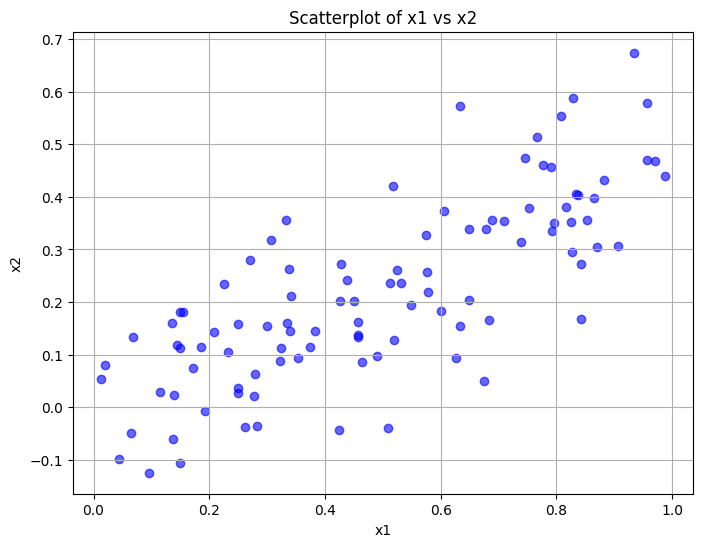

Correlation between x1 and x2: 0.772324497691354


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation between x1 and x2
correlation_x1_x2 = np.corrcoef(x1, x2)[0, 1]

# Create a scatterplot of x1 and x2
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, color='blue', alpha=0.6)
plt.title('Scatterplot of x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# Display the correlation
print("Correlation between x1 and x2:", correlation_x1_x2)


The result shows that the correlation between x1 and x2 is approximately 0.772, indicating a strong positive correlation.

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_0}$, and $\hat{\beta_0}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis H0 : $\beta_1$ = 0? How about the null hypothesis H0 : $\beta_2$ = 0?

In [4]:
import numpy as np
import statsmodels.api as sm

# Set seed for reproducibility using default_rng
rng = np.random.default_rng(10)

# Generate data for x1, x2, and y based on the specified equations
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Add a constant to x1 and x2 for the intercept term
X = np.column_stack((x1, x2))
X_with_intercept = sm.add_constant(X)

# Fit a least squares regression model
model = sm.OLS(y, X_with_intercept).fit()

# Get the estimated coefficients (hat beta0, hat beta1, hat beta2)
hat_Beta0, hat_Beta1, hat_Beta2 = model.params

# Get the p-values for beta1 and beta2 to test the null hypotheses
p_value_beta1 = model.pvalues[1]
p_value_beta2 = model.pvalues[2]

# Summarize the model results
model_summary = model.summary()

# Display the results
print("Estimated Beta0 (hat_Beta0):", hat_Beta0)
print("Estimated Beta1 (hat_Beta1):", hat_Beta1)
print("Estimated Beta2 (hat_Beta2):", hat_Beta2)
print("\nP-value for Beta1:", p_value_beta1)
print("P-value for Beta2:", p_value_beta2)
print("\nModel Summary:\n", model_summary)


Estimated Beta0 (hat_Beta0): 1.957909291136692
Estimated Beta1 (hat_Beta1): 1.6153676985271601
Estimated Beta2 (hat_Beta2): 0.9427766991595026

P-value for Beta1: 0.0028157851837825165
P-value for Beta2: 0.25941859445244947

Model Summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        09:42:19   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust           

Comparison to the True Values:

True $\beta_0$ was 2, while $\hat{\beta_0}$ is close at 1.958.

True $\beta_1$ was 2, but the estimate $\hat{\beta_1}$ is lower at 1.615.

True $\beta_2$ was 0.3, but the estimate $\hat{\beta_2}$ is higher at 0.943.

Hypothesis Testing:

For 𝐻0 : $\beta_1$ =0:

The p-value for $\beta_1$ is 0.003, which is less than the typical threshold of 0.05. Thus, we reject the null hypothesis and conclude that $\beta_1$ is significantly different from 0.

For 𝐻0 : $\beta_2$ =0:

The p-value for $\beta_2$ is 0.259, which is greater than 0.05. Thus, we fail to reject the null hypothesis and cannot conclude that  $\beta_2$ is significantly different from 0.

(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :  β1  = 0?

In [5]:
import statsmodels.api as sm

# Fit a least squares regression model using only x1
X_only_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_only_x1).fit()

# Get the estimated coefficient for Beta1 (with only x1)
hat_Beta0_x1, hat_Beta1_x1 = model_x1.params

# Get the p-value for Beta1 to test the null hypothesis H0: Beta1 = 0
p_value_beta1_x1 = model_x1.pvalues[1]

# Summarize the model results
model_x1_summary = model_x1.summary()

# Display the results
print("Estimated Beta0 (hat_Beta0):", hat_Beta0_x1)
print("Estimated Beta1 (hat_Beta1):", hat_Beta1_x1)
print("\nP-value for Beta1:", p_value_beta1_x1)
print("\nModel Summary:\n", model_x1_summary)


Estimated Beta0 (hat_Beta0): 1.9370901533116105
Estimated Beta1 (hat_Beta1): 2.0770623503939443

P-value for Beta1: 1.3678294472969653e-08

Model Summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        09:43:15   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

The model using only x1 still performs reasonably well in explaining y, and
$\beta_1$ is highly significant.

(e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : $\beta_1$ = 0?

In [6]:
import statsmodels.api as sm

# Fit a least squares regression model using only x2
X_only_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_only_x2).fit()

# Get the estimated coefficient for Beta2 (with only x2)
hat_Beta0_x2, hat_Beta2_x2 = model_x2.params

# Get the p-value for Beta2 to test the null hypothesis H0: Beta2 = 0
p_value_beta2_x2 = model_x2.pvalues[1]

# Summarize the model results
model_x2_summary = model_x2.summary()

# Display the results
print("Estimated Beta0 (hat_Beta0):", hat_Beta0_x2)
print("Estimated Beta2 (hat_Beta2):", hat_Beta2_x2)
print("\nP-value for Beta2:", p_value_beta2_x2)
print("\nModel Summary:\n", model_x2_summary)


Estimated Beta0 (hat_Beta0): 2.323890012497928
Estimated Beta2 (hat_Beta2): 2.9103232310329767

P-value for Beta2: 7.429580644947533e-07

Model Summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        09:43:45   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

Hypothesis Testing for 𝐻0 : $\beta_2$ =0:

The p-value for
$\beta_2$ is very small 7.43 × $10^{-7}$, so we reject the null hypothesis 𝐻0 : $\beta_2$ =0, meaning that $\beta_2$ is significantly different from 0, and 𝑥2 has a significant impact on 𝑦.


(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

No, the results obtained in (c)–(e) do not contradict each other. Instead, they reveal the presence of multicollinearity between x1 and x2 when both are used together in part (c), whereas using them individually in parts (d) and (e) results in significant coefficients. This is a common issue in regression analysis when predictors are highly correlated.

(g) Suppose we obtain one additional observation, which was unfortunately
mismeasured. We use the function np.concatenate() to np.concaadd
this additional observation to each of x1, x2 and y. tenate()

x1 = np.concatenate([x1, [0.1]])

x2 = np.concatenate([x2, [0.8]])

y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [7]:
import numpy as np
import statsmodels.api as sm

# Add the additional observation to x1, x2, and y
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# Re-fit the linear models from (c), (d), and (e) using the new data

# Model from part (c): Predict y using x1 and x2
X_with_intercept_new = sm.add_constant(np.column_stack((x1_new, x2_new)))
model_new_c = sm.OLS(y_new, X_with_intercept_new).fit()

# Model from part (d): Predict y using only x1
X_only_x1_new = sm.add_constant(x1_new)
model_new_d = sm.OLS(y_new, X_only_x1_new).fit()

# Model from part (e): Predict y using only x2
X_only_x2_new = sm.add_constant(x2_new)
model_new_e = sm.OLS(y_new, X_only_x2_new).fit()

# Get summaries of all models
summary_c = model_new_c.summary()
summary_d = model_new_d.summary()
summary_e = model_new_e.summary()

# Calculate influence measures (leverage) for model (c)
influence_c = model_new_c.get_influence()
leverage_c = influence_c.hat_matrix_diag
outlier_c = influence_c.resid_studentized_internal

# Display the summaries of the models
print("Model (c) summary (with both x1 and x2):")
print(summary_c)
print("\nModel (d) summary (with only x1):")
print(summary_d)
print("\nModel (e) summary (with only x2):")
print(summary_e)

# Display the leverage and residual information for the new observation
new_point_leverage = leverage_c[-1]
new_point_outlier = outlier_c[-1]

print(f"\nLeverage of the new observation: {new_point_leverage}")
print(f"Studentized residual (outlier measure) of the new observation: {new_point_outlier}")

# Check if it's a high leverage point or an outlier
leverage_threshold = 2 * (2 + 1) / len(x1_new)  # Rule of thumb for high leverage
print(f"Leverage threshold: {leverage_threshold}")
print(f"Is this a high-leverage point? {'Yes' if new_point_leverage > leverage_threshold else 'No'}")
print(f"Is this an outlier? {'Yes' if abs(new_point_outlier) > 2 else 'No'}")


Model (c) summary (with both x1 and x2):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        09:44:42   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

High-Leverage Point: Yes, the leverage score for the new observation in the model from part (c) is 0.348, which is much higher than the average leverage score. This means it has a substantial influence on the fit of the regression line.

Outlier: Yes, the studentized residual for the new observation is 2.69, which suggests it is an outlier (commonly, studentized residuals greater than 2 or less than -2 indicate outliers).